Based on these plots, the search criteria should be:
* $|l| < 15^\circ$
* $-20^\circ < b < 40^\circ$
* G > 10
* $\mu_b < -10~{\rm mas}~{\rm yr}^{-1}$

In [1]:
import astropy.coordinates as coord
import astropy.units as u

from gala.observation import apparent_magnitude
import gala.dynamics as gd
import gala.coordinates as gc
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('apw-notebook')
plt.rcParams['figure.dpi'] = 72
%matplotlib notebook

In [2]:
d = np.load("/Users/adrian/Downloads/best-ophiuchus-model.npy")

In [3]:
oph = gd.CartesianPhaseSpacePosition(pos=d[:3]*u.kpc, 
                                     vel=d[3:]*u.kpc/u.Myr)

<IPython.core.display.Javascript object>


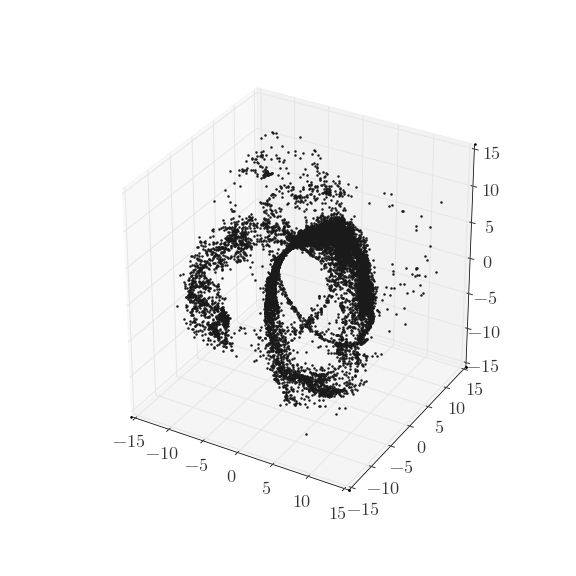

(-15, 15)

In [4]:
fig,ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection='3d'))
ax.plot(*oph.pos, linestyle='none')
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)
ax.set_zlim(-15,15)

In [5]:
idx = ((oph.pos[0] < 0*u.kpc) & (oph.pos[0] > -6*u.kpc) &
       (oph.pos[1] > -1*u.kpc) & (oph.pos[1] < 1*u.kpc) &
       (oph.pos[2] > -5*u.kpc) & (oph.pos[1] < 5*u.kpc))
       
oph_box = oph[idx]

<IPython.core.display.Javascript object>


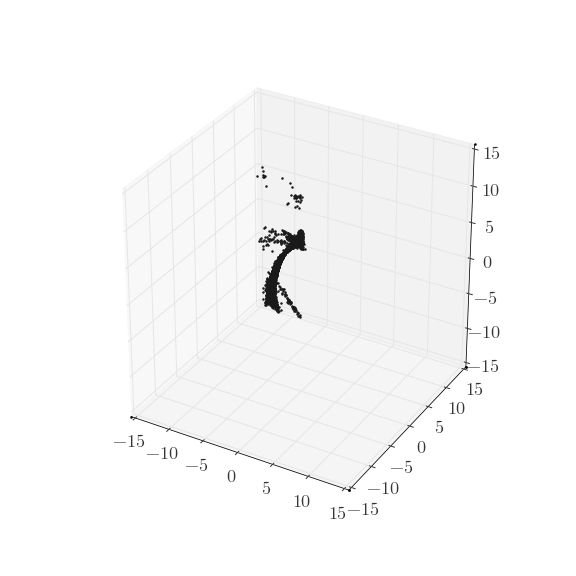

(-15, 15)

In [6]:
fig,ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection='3d'))
ax.plot(*oph_box.pos, linestyle='none')
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)
ax.set_zlim(-15,15)

In [7]:
gal,gal_v = oph_box.to_frame(coord.Galactic)

<IPython.core.display.Javascript object>


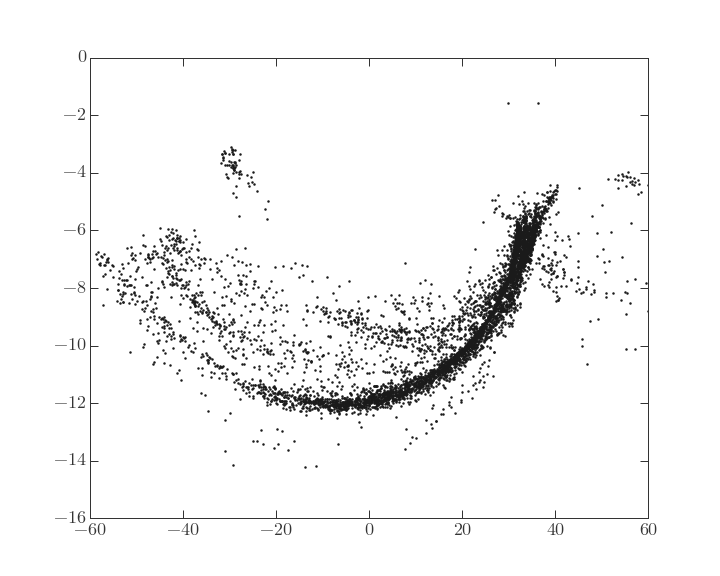

(-60, 60)

In [8]:
plt.figure()
plt.plot(gal.b.to(u.degree), gal_v[0].to(u.mas/u.yr), linestyle='none')
plt.xlim(-60,60)

<IPython.core.display.Javascript object>


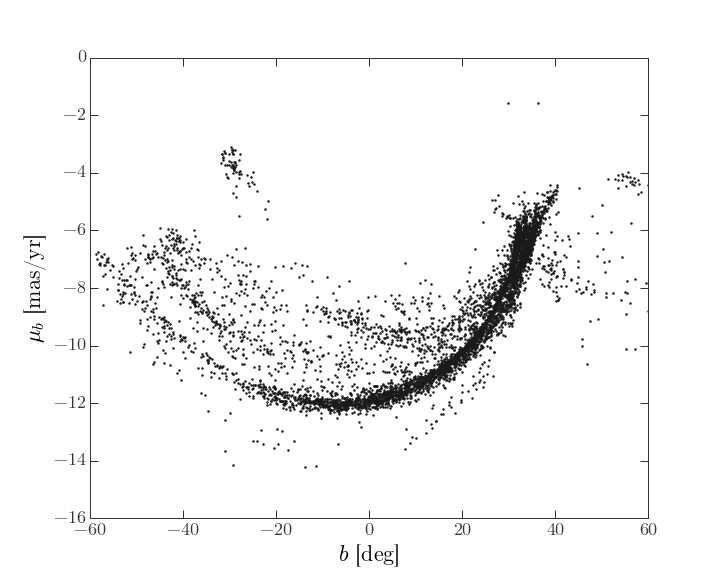

(-60, 60)

In [9]:
plt.figure()
plt.plot(gal.b.to(u.degree), gal_v[0].to(u.mas/u.yr), linestyle='none')
plt.xlabel('$b$ [deg]')
plt.ylabel(r'$\mu_b$ [mas/yr]')
plt.xlim(-60,60)

<IPython.core.display.Javascript object>


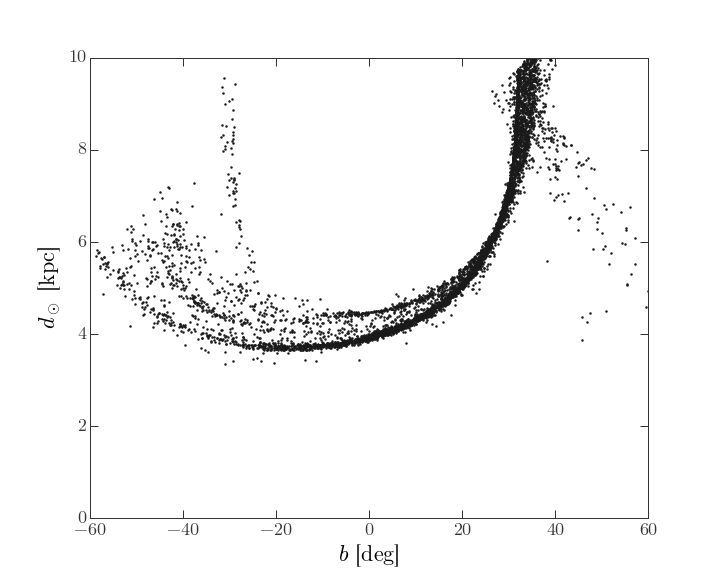

(0, 10)

In [10]:
plt.figure()
plt.plot(gal.b.to(u.degree), gal.distance.to(u.kpc), linestyle='none')
plt.xlabel('$b$ [deg]')
plt.ylabel(r'$d_\odot$ [kpc]')
plt.xlim(-60,60)
plt.ylim(0, 10)

<IPython.core.display.Javascript object>


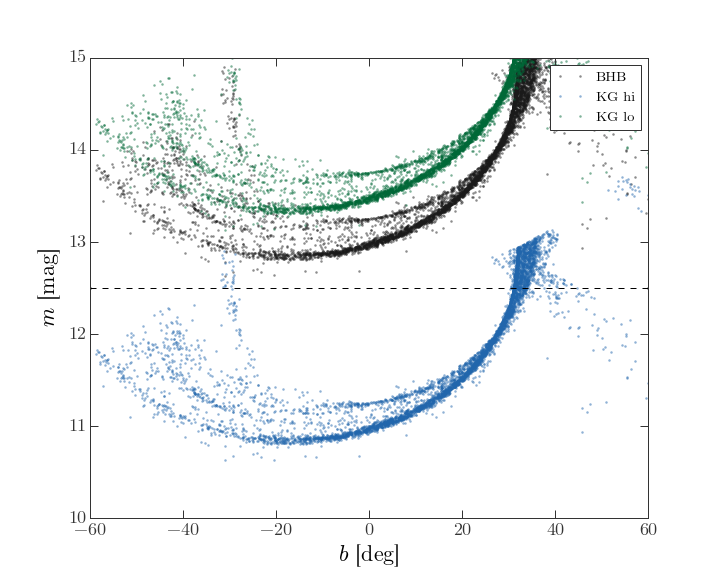

In [11]:
plt.figure()
plt.plot(gal.b.to(u.degree), apparent_magnitude(0, gal.distance.to(u.kpc)), 
         linestyle='none', label='BHB', alpha=0.5)
plt.plot(gal.b.to(u.degree), apparent_magnitude(-2, gal.distance.to(u.kpc)), 
         linestyle='none', label='KG hi', alpha=0.5)
plt.plot(gal.b.to(u.degree), apparent_magnitude(0.5, gal.distance.to(u.kpc)), 
         linestyle='none', label='KG lo', alpha=0.5)

plt.xlabel('$b$ [deg]')
plt.ylabel(r'$m$ [mag]')

plt.xlim(-60,60)
plt.ylim(10, 15)

plt.axhline(12.5, linestyle='dashed')

plt.legend()

In [12]:
icrs = gal.transform_to(coord.ICRS)

<IPython.core.display.Javascript object>


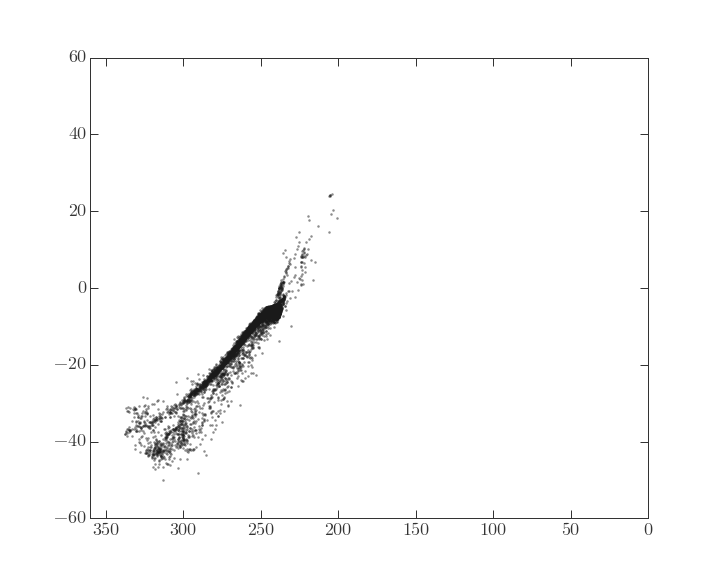

(-60, 60)

In [13]:
plt.figure()
plt.plot(icrs.ra.to(u.degree), icrs.dec.to(u.degree),
         linestyle='none', alpha=0.5)
plt.xlim(360, 0)
plt.ylim(-60,60)